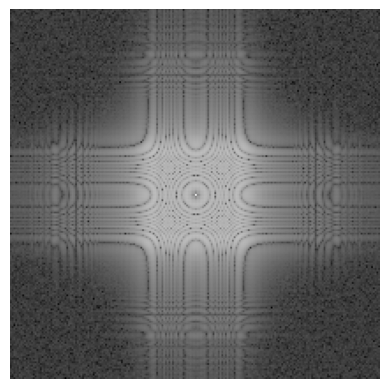

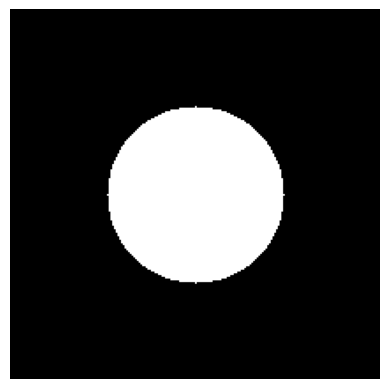

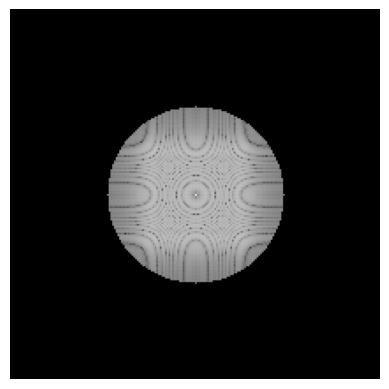

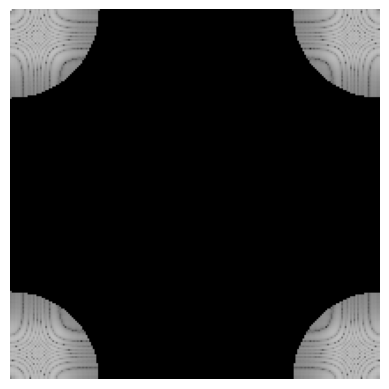

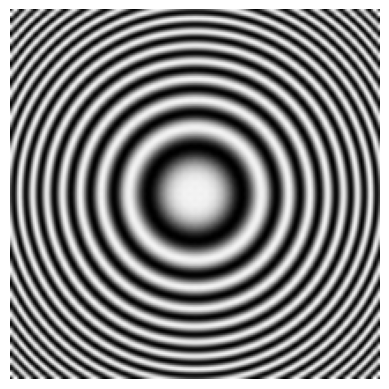

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

f = cv2.imread("zone.png", 0)

# image in frequency domain
F = np.fft.fft2(f)
# plt.imshow(np.log1p(np.abs(F)), cmap='gray')
# plt.axis('off')
# plt.show()

# shifting low frequency component to center of the image
Fshift = np.fft.fftshift(F)

# calculate the magnitude of the Fourier Transform
# used to visualize the frequency content of an image
plt.imshow(np.log1p(np.abs(Fshift)),cmap="gray")
plt.axis('off')
plt.show()

# low pass filter
M, N = f.shape
H = np.zeros((M, N), dtype=np.float32)
D0 = 50

for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0
            
plt.imshow(H, cmap='gray')
plt.axis("off")
plt.show()

# Ideal Low Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)),cmap="gray")
plt.axis("off")
plt.show()

# Inverse the shifted Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), cmap="gray")
plt.axis("off")
plt.show()

#Inverse the fourier transformation
g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap="gray")
plt.axis("off")
plt.show()

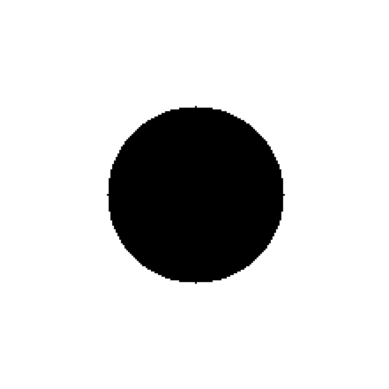

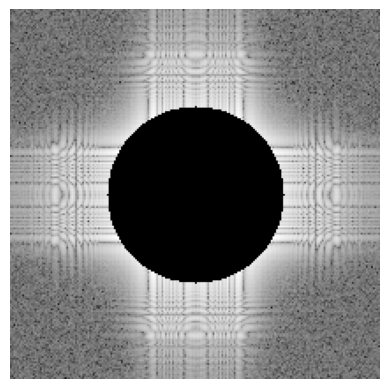

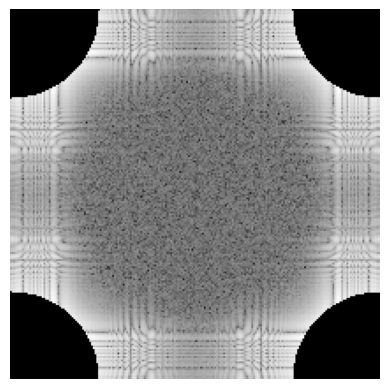

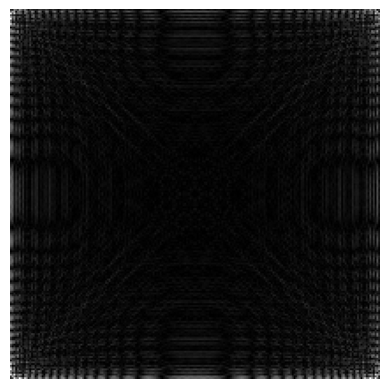

In [2]:
# high pass filter
H = 1 - H
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

# ideal high pass filter
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), cmap='gray')
plt.axis("off")
plt.show()

# inverse fourier transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), cmap='gray')
plt.axis("off")
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()